# Introdução

O mercado imobiliário desempenha um papel fundamental no desenvolvimento das cidades, impactando diretamente a vida de seus habitantes. Uma análise eficiente dos preços de aluguéis pode oferecer insights valiosos tanto para proprietários quanto para inquilinos, facilitando decisões de investimento e negociação.

Este projeto tem como objetivo prever os preços de aluguéis de casas em Uberlândia, Minas Gerais, utilizando técnicas de Machine Learning. A base de dados utilizada contem informações como características dos imóveis, suas dimensões e outros atributos relevantes.

Por meio de um modelo de Regressão Linear, buscamos identificar padrões nos dados que permitam estimar com precisão os valores dos aluguéis, além de compreender quais variáveis possuem maior influência sobre os preços.

A abordagem inclui:

* Tratamento e preparação dos dados coletados;
* Divisão dos dados em treino e teste para avaliação do modelo;
* Aplicação de métricas de desempenho para validar a acurácia das previsões;
* Visualização e análise dos resultados, como identificação de valores extremos e tendências nos dados.

Com o avanço de técnicas preditivas, este estudo visa fornecer uma solução prática e acessível para compreender o comportamento do mercado de aluguéis em Uberlândia, auxiliando futuros trabalhos e usuários interessados em análises do setor imobiliário.

### 1. Limpeza e Preparação de Dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = pd.read_csv('rent_house_price_data.csv')
df.head()

,Rent_price,Bedrooms,Square_meters,Garage,Bathrooms,City,Neighborhood
0,1.700,3,250.0,3,2.0,Uberlândia,Santa Rosa
1,1.600,3,150.0,0,2.0,Uberlândia,Mansour
2,2.000,2,120.0,1,3.0,Uberlândia,Jardim Inconfidência
3,4.200,4,240.0,2,4.0,Uberlândia,Segismundo Pereira
4,4.000,3,200.0,5,4.0,Uberlândia,Santa Mônica


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rent_price     2537 non-null   object 
 1   Bedrooms       2545 non-null   int64  
 2   Square_meters  2522 non-null   float64
 3   Garage         2545 non-null   int64  
 4   Bathrooms      2543 non-null   float64
 5   City           2545 non-null   object 
 6   Neighborhood   2545 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 139.3+ KB


In [3]:
df.describe()

,Bedrooms,Square_meters,Garage,Bathrooms
count,2545.000000,2522.000000,2545.000000,2543.000000
mean,3.181139,261.556701,2.424361,2.804562
std,0.978442,824.189601,1.474054,1.431887
min,1.000000,3.000000,0.000000,1.000000
25%,3.000000,125.000000,1.000000,2.000000
50%,3.000000,210.000000,2.000000,3.000000
75%,4.000000,300.000000,4.000000,4.000000
max,5.000000,40000.000000,5.000000,5.000000


### 1.1 Tratando valores nulos

In [4]:
df.isnull().any()

,0
Rent_price,True
Bedrooms,False
Square_meters,True
Garage,False
Bathrooms,True
City,False
Neighborhood,False


In [5]:
df.isnull().sum()

,0
Rent_price,8
Bedrooms,0
Square_meters,23
Garage,0
Bathrooms,2
City,0
Neighborhood,0


In [6]:
df = df.dropna(axis=0)
df.shape

(2519, 7)

In [7]:
df.isnull().any()

,0
Rent_price,False
Bedrooms,False
Square_meters,False
Garage,False
Bathrooms,False
City,False
Neighborhood,False


In [8]:
df.reset_index(drop=True, inplace=True)

### 1.2 Correção de Tipos de Dados

In [9]:
df['Rent_price'] = df['Rent_price'].str.replace('.', '').str.strip()
df['Rent_price'] = df['Rent_price'].astype(float)
df['Bathrooms'] = df['Bathrooms'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rent_price     2519 non-null   float64
 1   Bedrooms       2519 non-null   int64  
 2   Square_meters  2519 non-null   float64
 3   Garage         2519 non-null   int64  
 4   Bathrooms      2519 non-null   int64  
 5   City           2519 non-null   object 
 6   Neighborhood   2519 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 137.9+ KB


### 1.3 Tratando casas duplicadas

In [11]:
duplicates_houses = df.duplicated(subset=["Rent_price", "Bedrooms", "Square_meters", "Garage", "Bathrooms","City", "Neighborhood"], keep=False)

duplicates_houses_df = df[duplicates_houses]

print("DataFrame original:")
print(df)
print("\nDataFrame com duplicatas:")
print(duplicates_houses_df)

DataFrame original:
      Rent_price  Bedrooms  Square_meters  Garage  Bathrooms        City  \
0         1700.0         3          250.0       3          2  Uberlândia   
1         1600.0         3          150.0       0          2  Uberlândia   
2         2000.0         2          120.0       1          3  Uberlândia   
3         4200.0         4          240.0       2          4  Uberlândia   
4         4000.0         3          200.0       5          4  Uberlândia   
...          ...       ...            ...     ...        ...         ...   
2514      8000.0         3          300.0       5          4  Uberlândia   
2515     10000.0         4          310.0       4          3  Uberlândia   
2516      8000.0         4          300.0       5          4  Uberlândia   
2517      5010.0         3          370.0       4          3  Uberlândia   
2518      6000.0         5          205.0       2          3  Uberlândia   

              Neighborhood  
0               Santa Rosa  
1        

In [12]:
df = df.drop_duplicates(subset=['Rent_price', 'Bedrooms', 'Square_meters', 'Garage', 'Bathrooms', 'City', 'Neighborhood'])
df.reset_index(drop=True, inplace=True)
df.shape

(2341, 7)

### 1.4 Transformação de Atributos

Padronizando a coluna 'Square_meters'

In [16]:
df = df[df['Square_meters'] <= 2550]
df = df[(df['Rent_price'] < 7000)]

Square_meters_mean = df['Square_meters'].mean()
Square_meters_std = df['Square_meters'].std()

df.loc[:,'Square_meters_std'] = df['Square_meters'].apply(lambda num: (num - Square_meters_mean) / Square_meters_std)

df.head()

,Rent_price,Bedrooms,Square_meters,Garage,Bathrooms,City,Neighborhood,Square_meters_std
0,1700.0,3,250.0,3,2,Uberlândia,Santa Rosa,0.745248
1,1600.0,3,150.0,0,2,Uberlândia,Mansour,-0.250172
2,2000.0,2,120.0,1,3,Uberlândia,Jardim Inconfidência,-0.548798
3,4200.0,4,240.0,2,4,Uberlândia,Segismundo Pereira,0.645706
4,4000.0,3,200.0,5,4,Uberlândia,Santa Mônica,0.247538


In [17]:
df_sorted_by_square_meters_std = df.sort_values(by='Square_meters_std', ascending=False)
df_sorted_by_square_meters_std.head()

,Rent_price,Bedrooms,Square_meters,Garage,Bathrooms,City,Neighborhood,Square_meters_std
2052,3000.0,3,1100.0,2,1,Uberlândia,Bosque dos Buritis,9.206318
260,350.0,2,1000.0,5,1,Uberlândia,Tocantins,8.210898
1516,5000.0,5,711.0,5,2,Uberlândia,Martins,5.334134
1356,6500.0,3,700.0,4,5,Uberlândia,Tabajaras,5.224638
773,2500.0,2,600.0,5,2,Uberlândia,Martins,4.229218


In [18]:
df_sorted_by_square_meters = df.sort_values(by='Square_meters', ascending=False)
df_sorted_by_square_meters.head()

,Rent_price,Bedrooms,Square_meters,Garage,Bathrooms,City,Neighborhood,Square_meters_std
2052,3000.0,3,1100.0,2,1,Uberlândia,Bosque dos Buritis,9.206318
260,350.0,2,1000.0,5,1,Uberlândia,Tocantins,8.210898
1516,5000.0,5,711.0,5,2,Uberlândia,Martins,5.334134
1356,6500.0,3,700.0,4,5,Uberlândia,Tabajaras,5.224638
773,2500.0,2,600.0,5,2,Uberlândia,Martins,4.229218


In [19]:
df_sorted_by_rent_price = df.sort_values(by='Rent_price', ascending=False)
df_sorted_by_rent_price

,Rent_price,Bedrooms,Square_meters,Garage,Bathrooms,City,Neighborhood,Square_meters_std
1131,6800.0,4,450.0,4,5,Uberlândia,Cazeca,2.736088
777,6800.0,4,450.0,4,2,Uberlândia,Cazeca,2.736088
514,6800.0,3,350.0,2,3,Uberlândia,Lídice,1.740668
531,6800.0,3,380.0,4,1,Uberlândia,Lídice,2.039294
1788,6800.0,3,250.0,3,2,Uberlândia,Umuarama,0.745248
...,...,...,...,...,...,...,...,...
94,490.0,2,25.0,0,1,Uberlândia,Minas Gerais,-1.494447
404,400.0,1,35.0,0,1,Uberlândia,Presidente Roosevelt,-1.394905
133,360.0,1,33.0,0,1,Uberlândia,Residencial Integração,-1.414814
260,350.0,2,1000.0,5,1,Uberlândia,Tocantins,8.210898


Tratamento da coluna Neighborhood

In [20]:
# Conta o número de ocorrências de cada bairro
neighborhood_count = df['Neighborhood'].value_counts()

print(neighborhood_count)

Neighborhood
Santa Mônica               115
Martins                    101
Cidade Jardim               96
Brasil                      88
Nossa Senhora Aparecida     85
                          ... 
São José                     1
Chácaras Eldorado            1
Grand Ville                  1
Panorama                     1
Residencial Nosso Lar        1
Name: count, Length: 74, dtype: int64


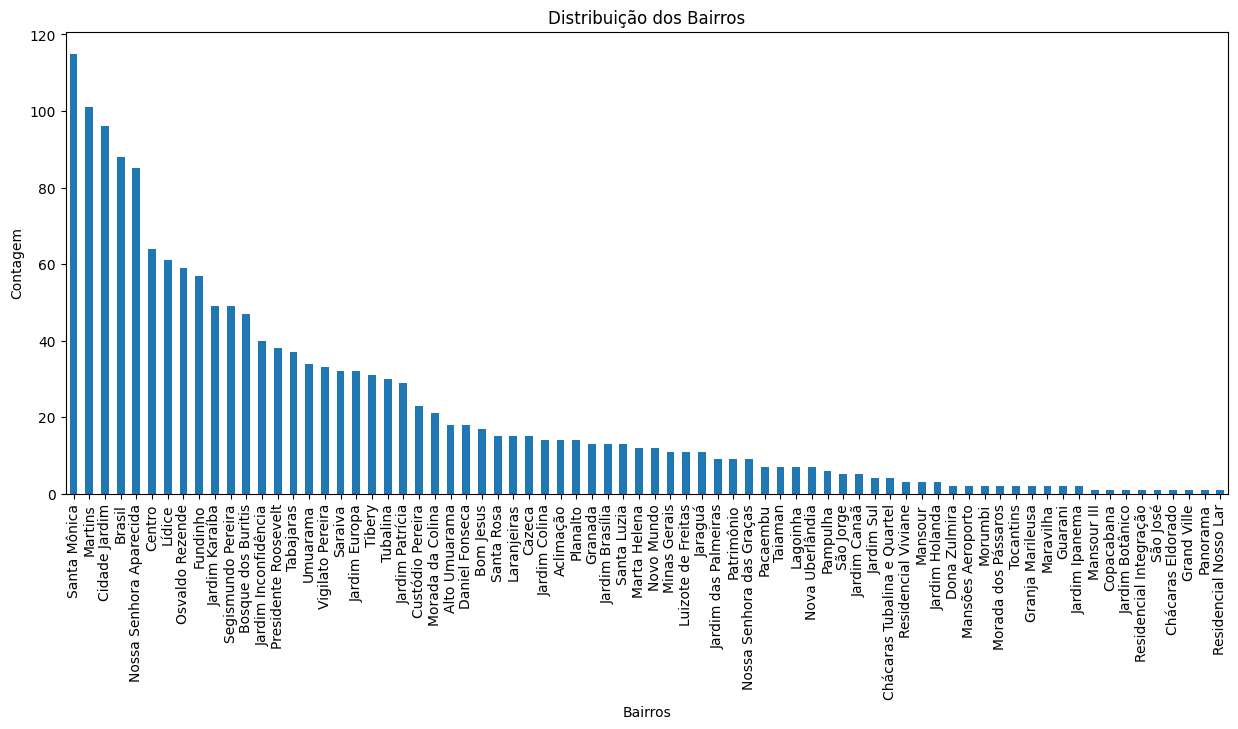

In [21]:
plt.figure(figsize=(15, 6))
neighborhood_count.plot(kind='bar')
plt.title('Distribuição dos Bairros')
plt.xlabel('Bairros')
plt.ylabel('Contagem')
plt.show()

Foi observado que alguns bairros possuem uma representatividade muito baixa na base de dados, o que pode comprometer a capacidade de generalização do modelo de Machine Learning.

Para resolver essa questão, os bairros foram agrupados em zonas geográficas: Centro, Norte, Sul, Leste e Oeste.
Os bairros que não se enquadram nessas zonas foram removidos da análise, garantindo maior consistência e robustez no treinamento e nas previsões do modelo.

In [22]:
df_bairros = df['Neighborhood'].unique()
print(df_bairros)

['Santa Rosa' 'Mansour' 'Jardim Inconfidência' 'Segismundo Pereira'
 'Santa Mônica' 'Jardim Patrícia' 'Vigilato Pereira' 'Centro'
 'Minas Gerais' 'Novo Mundo' 'Custódio Pereira' 'Morada da Colina'
 'Lídice' 'Cidade Jardim' 'Martins' 'Mansões Aeroporto' 'São Jorge'
 'Jardim Brasília' 'Nossa Senhora Aparecida' 'Daniel Fonseca' 'Jaraguá'
 'Bosque dos Buritis' 'Granada' 'Brasil' 'Marta Helena'
 'Presidente Roosevelt' 'Osvaldo Rezende' 'Morada dos Pássaros' 'Umuarama'
 'Tabajaras' 'Tubalina' 'Tibery' 'Aclimação' 'Jardim Canaã'
 'Luizote de Freitas' 'Fundinho' 'Planalto' 'Nossa Senhora das Graças'
 'Nova Uberlândia' 'Alto Umuarama' 'Jardim Ipanema' 'Saraiva'
 'Jardim Europa' 'Pacaembu' 'Residencial Viviane' 'Laranjeiras' 'Taiaman'
 'Residencial Integração' 'Jardim Karaíba' 'Lagoinha' 'Guarani'
 'Maravilha' 'Jardim das Palmeiras' 'Bom Jesus' 'Granja Marileusa'
 'Tocantins' 'Cazeca' 'Pampulha' 'Mansour III' 'Santa Luzia'
 'Jardim Holanda' 'Jardim Colina' 'Morumbi' 'Copacabana' 'Jardim Botânico

In [23]:
zona_centro = ['Centro', 'Fundinho', 'Nossa Senhora Aparecida', 'Martins', 'Osvaldo Rezende', 'Bom Jesus', 'Brasil', 'Cazeca', 'Lídice', 'Daniel Fonseca', 'Tabajaras']

zona_norte = ['Presidente Roosevelt', 'Jardim Brasília', 'São José', 'Marta Helena', 'Pacaembu', 'Santa Rosa', 'Residencial Gramado', 'Nossa Senhora das Graças', 'Minas Gerais', 'Distrito Industrial', 'Maravilha']

zona_oeste = ['Jaraguá', 'Planalto', 'Chácaras Tubalina', 'Chácaras Panorama', 'Luizote de Freitas', 'Jardim das Palmeiras', 'Jardim Patrícia', 'Jardim Holanda', 'Jardim Europa', 'Jardim Canaã', 'Mansour', 'Dona Zulmira', 'Taiaman', 'Guarani', 'Tocantins', 'Morada do Sol', 'Monte Hebron', 'Residencial Pequis', 'Morada Nova']

zona_sul = ['Jardim Botânico', 'Copacabana', 'Jardim Colina', 'Residencial Viviane', 'Tubalina', 'Cidade Jardim', 'Nova Uberlândia', 'Patrimônio', 'Morada da Colina', 'Vigilato Pereira', 'Saraiva', 'Lagoinha', 'Carajás', 'Pampulha', 'Jardim Karaíba', 'Jardim Inconfidência', 'Santa Luzia', 'Granada', 'São Jorge', 'Laranjeiras', 'Shopping Park', 'Jardim Sul', 'Gávea']

zona_leste = ['Santa Mônica', 'Bosque dos Buritis', 'Tibery', 'Segismundo Pereira', 'Umuarama', 'Alto Umuarama', 'Custódio Pereira', 'Aclimação', 'Mansões Aeroporto', 'Alvorada', 'Novo Mundo', 'Morumbi', 'Residencial Integração', 'Morada dos Pássaros', 'Jardim Ipanema', 'Portal do Vale', 'Granja Marileusa', 'Grand Ville']

In [24]:
# Processo de one-hot encoding
df.loc[:,'centro'] = df['Neighborhood'].apply(lambda x: 1 if x in zona_centro else 0)
df.loc[:,'norte'] = df['Neighborhood'].apply(lambda x: 1 if x in zona_norte else 0)
df.loc[:,'oeste'] = df['Neighborhood'].apply(lambda x: 1 if x in zona_oeste else 0)
df.loc[:,'sul'] = df['Neighborhood'].apply(lambda x: 1 if x in zona_sul else 0)
df.loc[:,'leste'] = df['Neighborhood'].apply(lambda x: 1 if x in zona_leste else 0)

In [25]:
# Removendo colunas que não vão mais ser utilizadas
df.drop(['Square_meters','Neighborhood','City'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(1602, 10)

## 2. Separando Dados

In [26]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    df.drop(['Rent_price'], axis=1),
    df['Rent_price'],
    test_size = 0.25,
    random_state = 123
)

In [27]:
predictors_train.shape

(1201, 9)

In [28]:
predictors_test.shape

(401, 9)

In [29]:
target_train.shape

(1201,)

In [30]:
target_test.shape

(401,)

## 3. Treinamento de Modelo

In [31]:
model = LinearRegression()

In [32]:
model = model.fit(predictors_train, target_train)

In [33]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Bedrooms', 'Garage', 'Bathrooms', 'Square_meters_std', 'centro',
        'norte', 'oeste', 'sul', 'leste'], dtype=object),
 'n_features_in_': 9,
 'coef_': array([ 189.58762156,  105.02366042,  403.5645249 ,  678.94650559,
         162.3358574 , -242.2400061 ,   96.51580209,  588.92659427,
         327.86386095]),
 'rank_': 9,
 'singular_': array([59.95960299, 34.96547747, 26.91108876, 23.99596185, 18.61292543,
        16.46792724, 10.88662067,  8.86245597,  0.99619674]),
 'intercept_': 1333.8294890393981}

## 4. Avaliação

In [34]:
target_predicted = model.predict(predictors_test)

In [35]:
target_predicted[0:5]

array([ 973.29214518, 4060.94662182, 3601.60467387, 4256.12001028,
       4487.53735869])

In [36]:
target_predicted.shape

(401,)

In [37]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

1063.0615628990313


In [38]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['Rent_price'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False

In [39]:
test_data

,Bedrooms,Garage,Bathrooms,Square_meters_std,centro,norte,oeste,sul,leste,Rent_price,predicted
0,1,0,1,-1.643760,1,0,0,0,0,2200.0,False
1,3,3,4,0.098225,1,0,0,0,0,2900.0,False
2,3,2,2,0.765156,1,0,0,0,0,4500.0,False
3,4,4,3,0.546164,1,0,0,0,0,4800.0,False
4,3,3,4,0.098225,0,0,0,1,0,5500.0,False
...,...,...,...,...,...,...,...,...,...,...,...
396,3,0,2,-0.857379,0,0,0,0,1,2000.0,False
397,3,4,3,0.795019,0,0,0,0,1,5300.0,False
398,4,2,3,0.994103,0,0,0,0,1,3900.0,False
399,3,4,3,-0.051088,0,0,0,1,0,2300.0,False


In [40]:
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['Rent_price'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

In [41]:
prediction_data

,Bedrooms,Garage,Bathrooms,Square_meters_std,centro,norte,oeste,sul,leste,Rent_price,predicted
0,1,0,1,-1.643760,1,0,0,0,0,973.292145,True
1,3,3,4,0.098225,1,0,0,0,0,4060.946622,True
2,3,2,2,0.765156,1,0,0,0,0,3601.604674,True
3,4,4,3,0.546164,1,0,0,0,0,4256.120010,True
4,3,3,4,0.098225,0,0,0,1,0,4487.537359,True
...,...,...,...,...,...,...,...,...,...,...,...
396,3,0,2,-0.857379,0,0,0,0,1,2455.471114,True
397,3,4,3,0.795019,0,0,0,0,1,4401.019632,True
398,4,2,3,0.994103,0,0,0,0,1,4515.727324,True
399,3,4,3,-0.051088,0,0,0,1,0,4087.620950,True


In [42]:
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

In [43]:
# Ordena o DataFrame pela coluna Square_meters_std do maior para o menor
df_sorted = prediction.sort_values(by='Square_meters_std', ascending=False)

# Mostra os primeiros 10 maiores valores padronizados
print(df_sorted[['Square_meters_std']].head(10))

# Mostra os últimos 10 menores valores padronizados
print(df_sorted[['Square_meters_std']].tail(10))


     Square_meters_std
728           5.334134
327           5.334134
138           3.233798
539           3.233798
288           2.974989
668           2.974989
689           2.974989
267           2.974989
701           2.755996
300           2.755996
     Square_meters_std
700           -1.64376
435           -1.64376
458           -1.64376
489           -1.64376
560           -1.64376
570           -1.64376
645           -1.64376
672           -1.64376
682           -1.64376
401           -1.64376


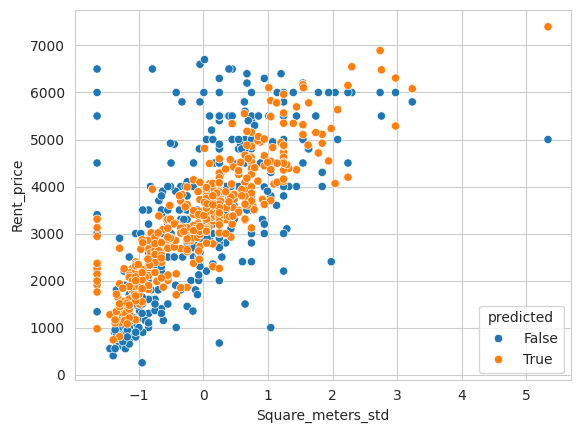

In [44]:
with sns.axes_style('whitegrid'):


  sns.scatterplot(data=prediction,x='Square_meters_std', y='Rent_price', hue='predicted')

## 5. Previsão

In [46]:
Bedrooms = int(input('Quantidade de quartos da casa: '))
Garage = int(input('Vagas de garagem: '))
Bathrooms = int(input('Quantidade de banheiros da casa: '))
Square_meters = float(input('M² da casa: '))
Square_meters_std = (Square_meters - Square_meters_mean) / Square_meters_std

Quantidade de quartos da casa: 2
Vagas de garagem: 1
Quantidade de banheiros da casa: 1
M² da casa: 35


In [47]:
zona = int(input('Selecione a zona da residência:\n1: Centro\n2: Norte\n3: Oeste\n4: Sul\n5: Leste\n Digite o número correspondente à sua zona: '))

Selecione a zona da residência:
1: Centro
2: Norte
3: Oeste
4: Sul
5: Leste
 Digite o número correspondente à sua zona: 1


In [48]:
zona_array = [0, 0, 0, 0, 0]

if zona == 1:
    zona_array[0] = 1
elif zona == 2:
    zona_array[1] = 1
elif zona == 3:
    zona_array[2] = 1
elif zona == 4:
    zona_array[3] = 1
elif zona == 5:
    zona_array[4] = 1
else:
    print('Zona inválida. Reinicie o programa e selecione uma zona válida.')

In [49]:
print(f'{Square_meters_mean} -- {Square_meters_std}')

175.1323345817728 -- -1.394905342704747


In [50]:
house_array = np.array([Bedrooms, Garage, Bathrooms, Square_meters_std] + zona_array)
print(house_array)

[ 2.          1.          1.         -1.39490534  1.          0.
  0.          0.          0.        ]


In [51]:
rent_price = model.predict(house_array.reshape(1, -1))
print(rent_price)

[1436.86266682]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
